In [5]:
!pip install face_recognition
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

In [23]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_68_face_landmarks.dat"


--2023-06-22 13:54:03--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  7.24MB/s    in 21s     

2023-06-22 13:54:25 (2.88 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



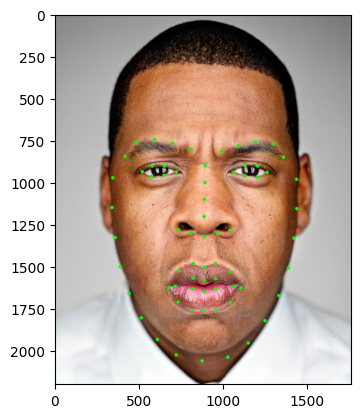

In [34]:
hog_face_detector = dlib.get_frontal_face_detector()
dlib_facelandmark = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

img = dlib.load_rgb_image("MS_Jay_Z_CloseUp.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = hog_face_detector(gray)

landmark_tuple = []
for face in faces:
  face_landmarks = dlib_facelandmark(gray, face)
  for n in range(0, 68):
    x = face_landmarks.part(n).x
    y = face_landmarks.part(n).y
    landmark_tuple.append((x, y))
    cv2.circle(img, (x, y), 5, (0, 255, 0), 10)

plt.imshow(img)


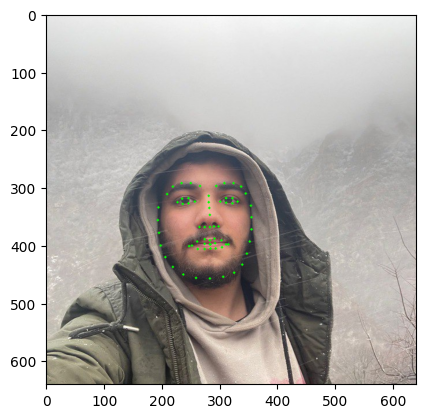

In [38]:
hog_face_detector = dlib.get_frontal_face_detector()
dlib_facelandmark = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

img = dlib.load_rgb_image("faris.jfif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = hog_face_detector(gray)

landmark_tuple = []
for face in faces:
  face_landmarks = dlib_facelandmark(gray, face)
  for n in range(0, 68):
    x = face_landmarks.part(n).x
    y = face_landmarks.part(n).y
    landmark_tuple.append((x, y))
    cv2.circle(img, (x, y), 2, (0, 255, 0), -1)

plt.imshow(img)


In [70]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt


face2 = cv2.imread("MS_Jay_Z_CloseUp.jpg")
face1 = cv2.imread("faris2.jpg")

face1_bw = cv2.cvtColor(face1, cv2.COLOR_BGR2GRAY)
face2_bw = cv2.cvtColor(face2, cv2.COLOR_BGR2GRAY)


height, width, _ = face1.shape
mask = np.zeros((height, width), np.uint8)

height, width, _ = face2.shape

In [71]:
def get_landmarks(landmarks):
  landmarks_points = []

  for n in range(68):
      x = landmarks.part(n).x
      y = landmarks.part(n).y
      landmarks_points.append((x, y))
  return landmarks_points

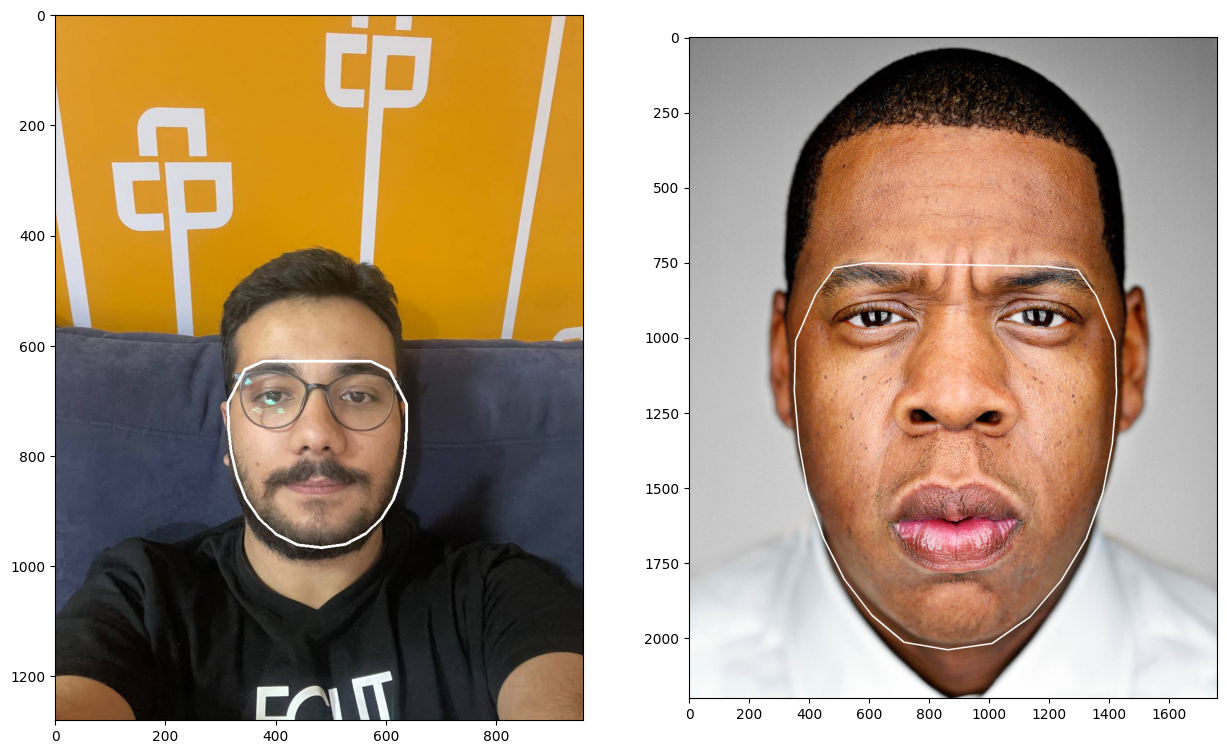

In [72]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")

rect = detector(face1_bw)[0]
rect2 = detector(face2_bw)[0]

landmarks = predictor(face1_bw, rect)
landmarks_points = np.array(get_landmarks(landmarks), np.int32)

landmarks_2 = predictor(face2_bw, rect2)
landmarks_points2 = np.array(get_landmarks(landmarks_2), np.int32)

convexhull = cv2.convexHull(landmarks_points)
convexhull2 = cv2.convexHull(landmarks_points2)

face1_cp = face1.copy()
face2_cp = face2.copy()

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(cv2.cvtColor((cv2.polylines(face1_cp, [convexhull], True, (255,255,255), 3)), cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor((cv2.polylines(face2_cp, [convexhull2], True, (255,255,255), 3)), cv2.COLOR_BGR2RGB))

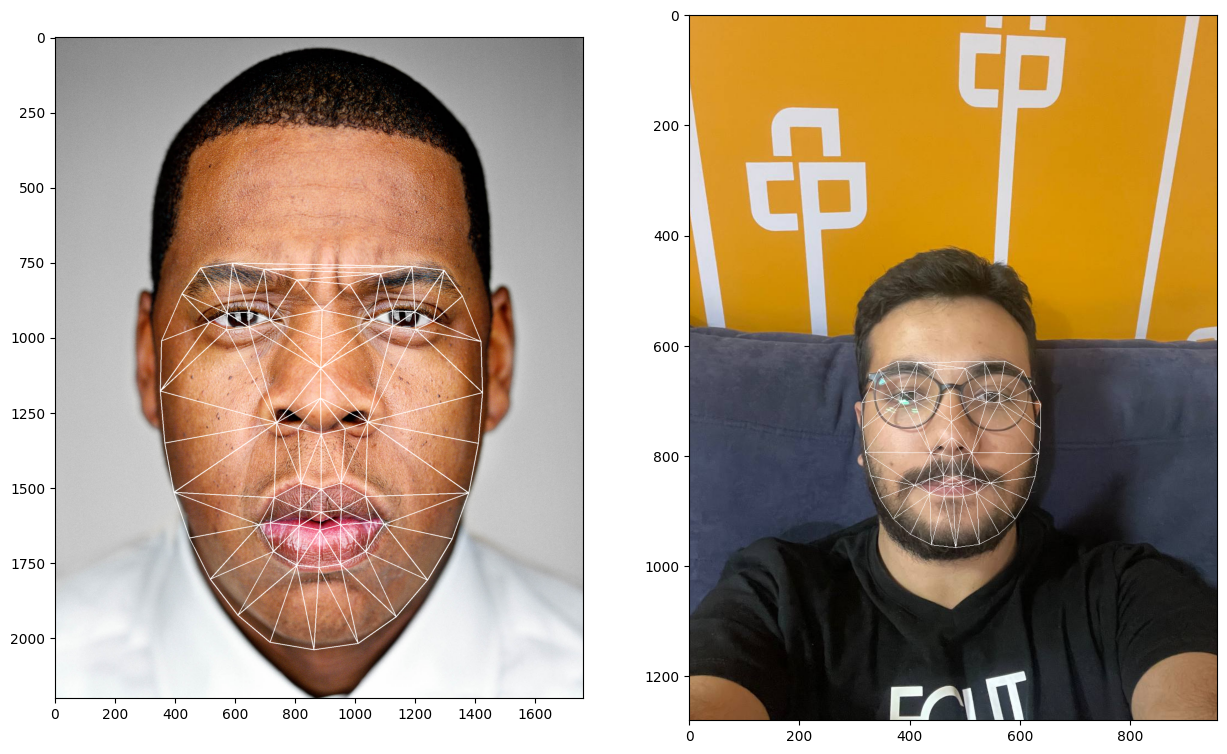

In [73]:
rect = cv2.boundingRect(convexhull)

subdiv = cv2.Subdiv2D(rect)
subdiv.insert(landmarks_points.tolist())
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

triangles_indexes = []
face1_cp = face1.copy()


for triangle in triangles :
    pt1 = (triangle[0], triangle[1])
    pt2 = (triangle[2], triangle[3])
    pt3 = (triangle[4], triangle[5])

    cv2.line(face1_cp, pt1, pt2, (255, 255, 255), 1,  0)
    cv2.line(face1_cp, pt2, pt3, (255, 255, 255), 1,  0)
    cv2.line(face1_cp, pt3, pt1, (255, 255, 255), 1,  0)

    index_pt1 = np.where((landmarks_points == pt1).all(axis=1))[0][0]
    index_pt2 = np.where((landmarks_points == pt2).all(axis=1))[0][0]
    index_pt3 = np.where((landmarks_points == pt3).all(axis=1))[0][0]

    vertices = [index_pt1, index_pt2, index_pt3]
    triangles_indexes.append(vertices)


subdiv = cv2.Subdiv2D(cv2.boundingRect(convexhull2))
subdiv.insert(landmarks_points2.tolist())
triangles2 = subdiv.getTriangleList()
triangles2 = np.array(triangles2, dtype=np.int32)


face2_cp = face2.copy()

for triangle in triangles2:
    pt1 = (triangle[0], triangle[1])
    pt2 = (triangle[2], triangle[3])
    pt3 = (triangle[4], triangle[5])

    cv2.line(face2_cp, pt1, pt2, (255, 255, 255), 2,  0)
    cv2.line(face2_cp, pt2, pt3, (255, 255, 255), 2,  0)
    cv2.line(face2_cp, pt3, pt1, (255, 255, 255), 2,  0)


fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(cv2.cvtColor(face2_cp, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(face1_cp, cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(face2_cp, cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(face1_cp, cv2.COLOR_BGR2RGB))

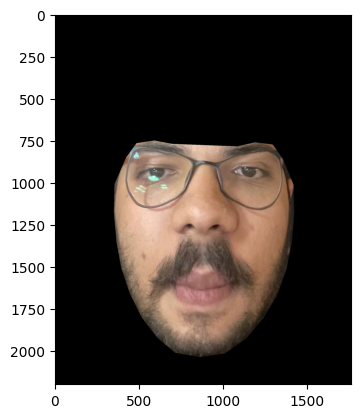

In [74]:
new_face = np.zeros((height, width, 3), np.uint8)


for triangle in triangles_indexes:
    pt1 = landmarks_points[triangle[0]]
    pt2 = landmarks_points[triangle[1]]
    pt3 = landmarks_points[triangle[2]]

    (x, y, width, height) = cv2.boundingRect(np.array([pt1, pt2, pt3], np.int32))
    cropped_triangle = face1[y: y+height, x: x+width]
    points = np.array([[pt1[0]-x, pt1[1]-y], [pt2[0]-x, pt2[1]-y], [pt3[0]-x, pt3[1]-y]], np.int32)

    pt1 = landmarks_points2[triangle[0]]
    pt2 = landmarks_points2[triangle[1]]
    pt3 = landmarks_points2[triangle[2]]

    (x, y, width, height) = cv2.boundingRect(np.array([pt1, pt2, pt3], np.int32))
    cropped_mask2 = np.zeros((height,width), np.uint8)
    points2 = np.array([[pt1[0]-x, pt1[1]-y], [pt2[0]-x, pt2[1]-y], [pt3[0]-x, pt3[1]-y]], np.int32)
    cv2.fillConvexPoly(cropped_mask2, points2, 255)

    points =  np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    dist_triangle = cv2.warpAffine(cropped_triangle, M, (width, height))
    dist_triangle = cv2.bitwise_and(dist_triangle, dist_triangle, mask=cropped_mask2)

    new_face_rect_area = new_face[y: y+height, x: x+width]
    new_face_rect_area_gray = cv2.cvtColor(new_face_rect_area, cv2.COLOR_BGR2GRAY)

    _, masked_triangle = cv2.threshold(new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    dist_triangle = cv2.bitwise_and(dist_triangle, dist_triangle, mask=masked_triangle)
    new_face_rect_area = cv2.add(new_face_rect_area, dist_triangle)
    new_face[y: y+height, x: x+width] = new_face_rect_area

plt.imshow(cv2.cvtColor(new_face, cv2.COLOR_BGR2RGB))
plt.show()

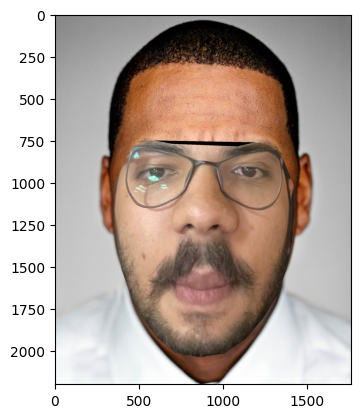

In [75]:
face_mask = cv2.bitwise_not(cv2.fillConvexPoly(np.zeros_like(face2_bw), convexhull2, 255))

body_maskless = cv2.bitwise_and(face2, face2, mask=face_mask)
result = cv2.add(body_maskless, new_face)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))